# Titanic Project

In this blog-post, I am gonna go go through the whole process of creating a machine learning model on the dataset Titanic , It's the used by many people over the world. It provides information on the fate of passengers on the Titanic, summarized according to economic status (class), sex, age and survival.


​

In [60]:
from IPython.display import Image
Image(url="https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/the-white-star-line-passenger-liner-r-m-s-titanic-embarking-news-photo-1608252641.?crop=1.00xw:0.790xh;0,0.164xh&resize=1200:*")

# Let's Importing the Libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

Github link is provided below, now we can extract data from Github

In [62]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The dataset has 891 examples and 11 features + the target variable (survived). 2 of the features are the floats, 5 are integers and 5 are objects. Below I have listed the features.

Above we can see that 11 features + the target variable (survived). What features could contribute to a high survival rate ?

# Data Description:---

 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [63]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [68]:
Image(url="https://images.newindianexpress.com/uploads/user/imagelibrary/2021/1/13/w1200X800/Voyage_of_Nightmares_and.jpg")

# Data Dictionary


Survived: 0 = No, 1 = Yes
pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
sibsp: # of siblings / spouses aboard the Titanic
parch: # of parents / children aboard the Titanic
ticket: Ticket number
cabin: Cabin number
embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

# Checking null value

In [69]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

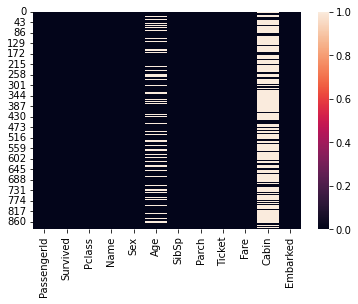

In [70]:
import seaborn as sns
sns.heatmap(df.isnull())

There are so many null values

we can see that the features columns which have  different ranges, that we will need to convert into roughly the same scale. We can also spot some more features, that contain missing values (NaN = not a number), that wee need to deal with.

In [71]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))

In [72]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [73]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [74]:
imp=SimpleImputer(strategy="most_frequent")
df['Cabin']=imp.fit_transform(df['Cabin'].values.reshape(-1,1))

In [75]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [76]:
imp=SimpleImputer(strategy="most_frequent")
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))

In [77]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [78]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:>

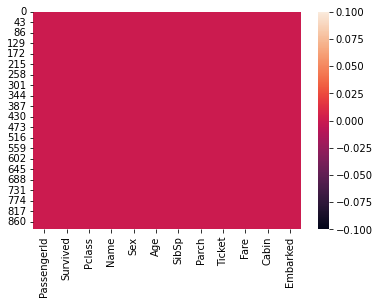

In [79]:
import seaborn as sns
sns.heatmap(df.isnull())

all null values are filled

In [80]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# EDA

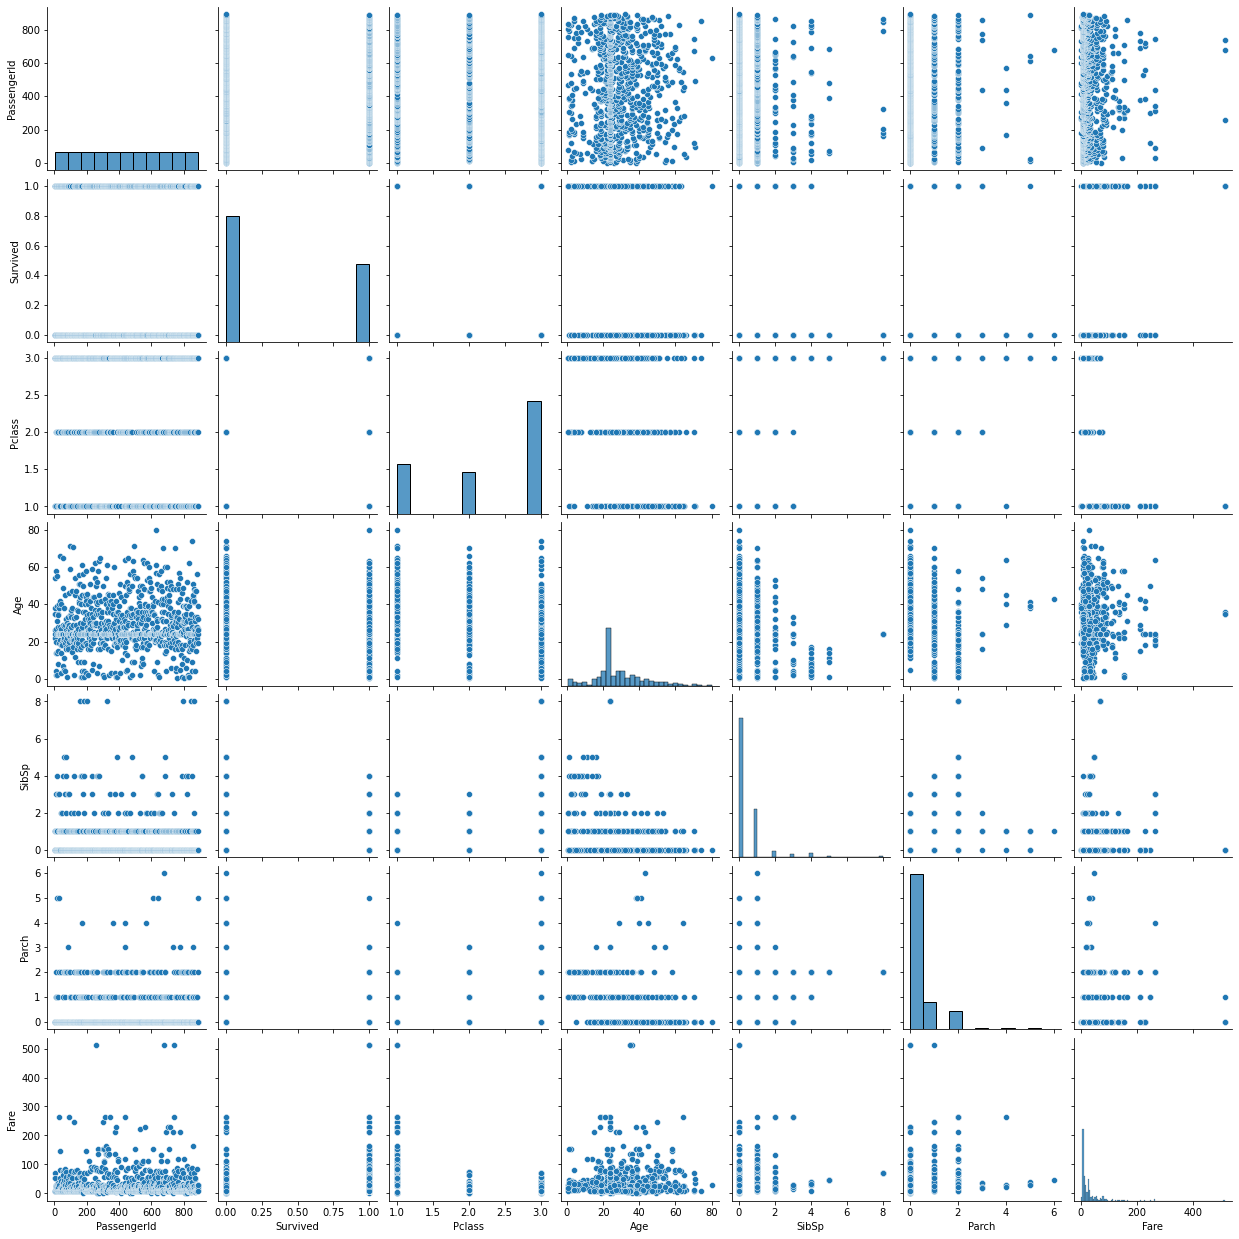

In [81]:
sns.pairplot(df)

# Let's do Hist plot

<AxesSubplot:ylabel='Frequency'>

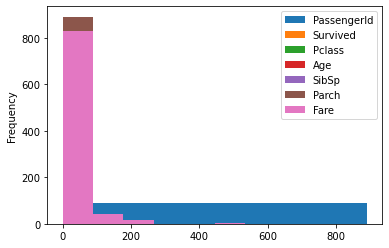

In [82]:
df.plot(kind="hist")

# Cabin


As a reminder, we have to deal with Cabin (687), Embarked (2) and Age (177). First I thought, and I have to delete the ‘Cabin’ variable but then I will found some interesting and thecabin number looks like ‘C123’ and the letter refers to the deck. Therefore we’re going to extract these and create a new feature, that has to be contains a persons deck. Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero.

# Let's do....Bar Chart for Categorical Features

# Pclass and Sex:

In [83]:
def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    df1 = pd.DataFrame([survived,dead])
    df1.index = ['Survived','Dead']
    df1.plot(kind='bar',stacked=True, figsize=(10,6))

Survived :
 female    233
male      109
Name: Sex, dtype: int64
Dead:
 male      468
female     81
Name: Sex, dtype: int64


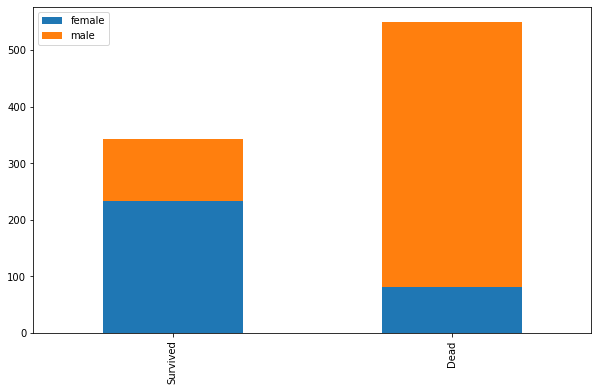

In [84]:
bar_chart('Sex')
print("Survived :\n",df[df['Survived']==1]['Sex'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Sex'].value_counts())

Observation:here female more likely survivied than Male.

# Pclass:

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


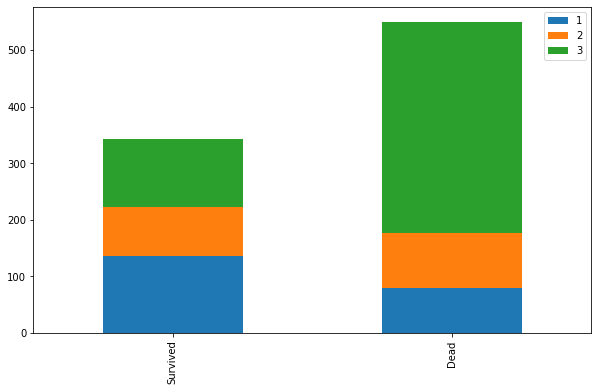

In [85]:
bar_chart('Pclass')
print("Survived :\n",df[df['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Pclass'].value_counts())

Observation:here 1st class more likely survivied than other classes and
                             3rd class more likely dead than other classes

#  SibSp and Parch:

SibSp and Parch will make more of the sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. I will create it below and also the feature which is sows if someone is not alone.

Survived :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


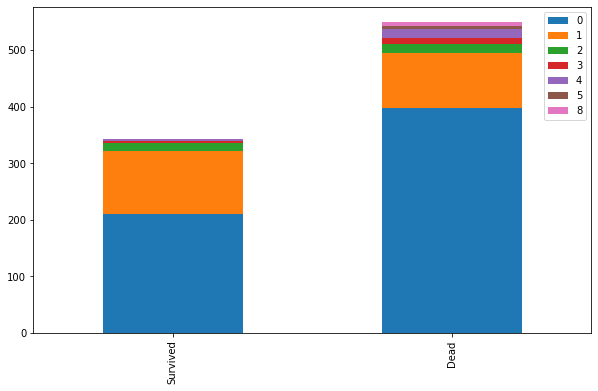

In [86]:
bar_chart('SibSp')
print("Survived :\n",df[df['Survived']==1]['SibSp'].value_counts())
print("Dead:\n",df[df['Survived']==0]['SibSp'].value_counts())

Observation:here a person aboarded with more than 2 siblings or wife more likely survived or another  a person aboarded without siblings or wife likely dead

Survived :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead:
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


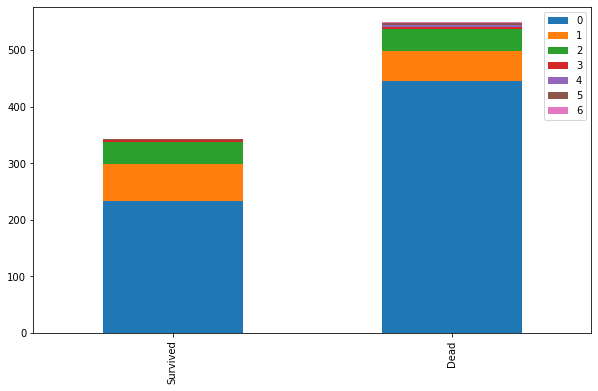

In [87]:
bar_chart('Parch')
print("Survived :\n",df[df['Survived']==1]['Parch'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Parch'].value_counts())


Observation:here a a person aboarded with more than 2 parents or children more likely survived and a person aboarded alone more likely dead

# Embarked

Survived :
 S    219
C     93
Q     30
Name: Embarked, dtype: int64
Dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


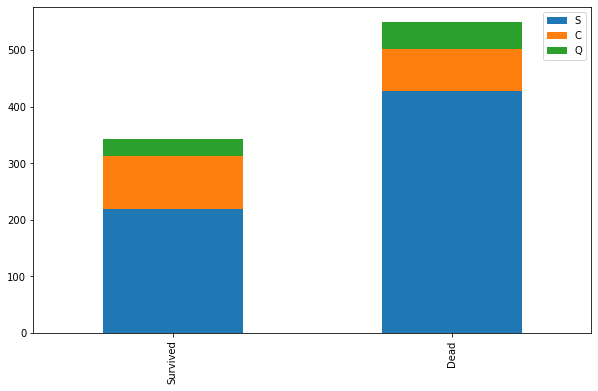

In [88]:
bar_chart('Embarked')
print("Survived :\n",df[df['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Embarked'].value_counts())

Observation:here Embarked which is seems to be correlated with survival, depending on the gender.

Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.



# Let's do Pclass and Sex:

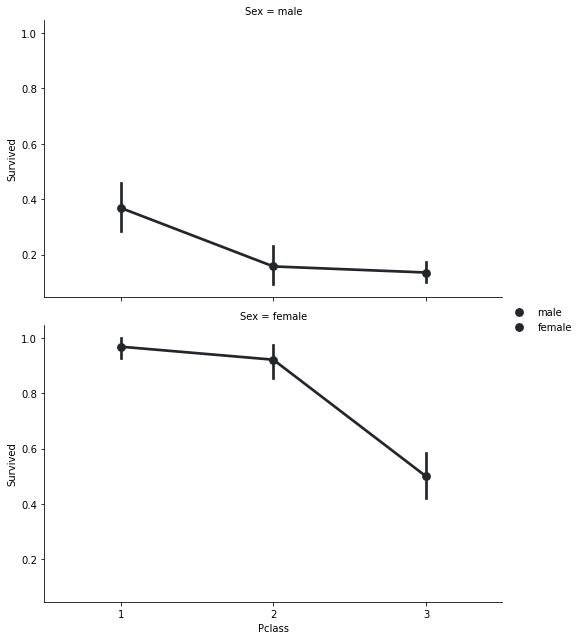

In [89]:
FacetGrid = sns.FacetGrid(df, row='Sex', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None )
FacetGrid.add_legend() 


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

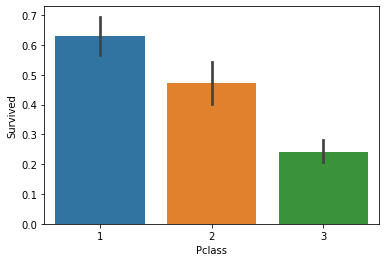

In [90]:
sns.barplot(x='Pclass', y='Survived', data=df)

Here we can see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in  the class .

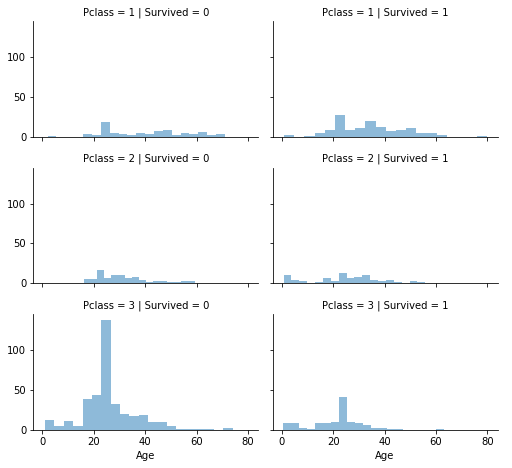

In [91]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Observations:we can see that men have they high probability of the survival when they are between 18 and 30 years old, they are also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

For men  probability of the survival are very low between the age of 5 and 18, it  isn’t true for women. Another thing to note so that infants also have a little bit higher probability of survival.

So there seem to be certain ages, which we have the increased odds of survival and because I want every feature to be roughly on the same scale, I will create age groups later on.

In [92]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036186,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.052872,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.356187,0.083081,0.018443,-0.549500
Age,0.036186,-0.052872,-0.356187,1.000000,-0.232411,-0.155118,0.107554
SibSp,-0.057527,-0.035322,0.083081,-0.232411,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.155118,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.107554,0.159651,0.216225,1.000000


now I can see that men have a high probability of the survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. Women who are the survival chances are higher between 14 and 40.

and the men the probability of the survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival.

In [93]:
df.corr()["Survived"].sort_values()

Pclass        -0.338481
Age           -0.052872
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

<AxesSubplot:>

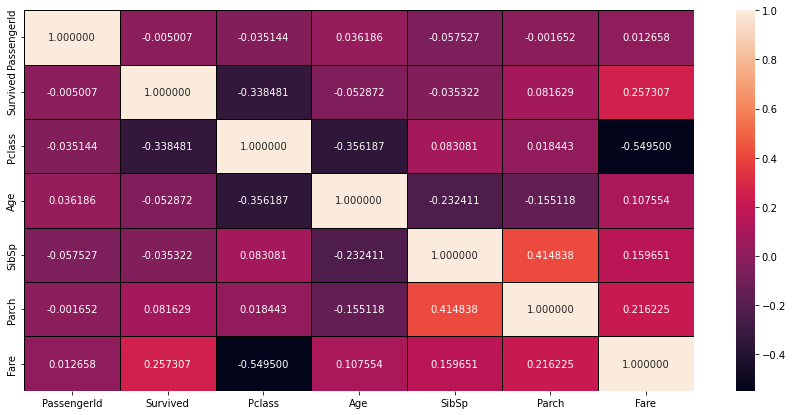

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='2f')

# Correlation observation:

Name,Age,Ticket,Embarcked,sibsp this are very inversaly correlated

Fare and Cabin are also strongly correlated

# Describing dataset

In [95]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


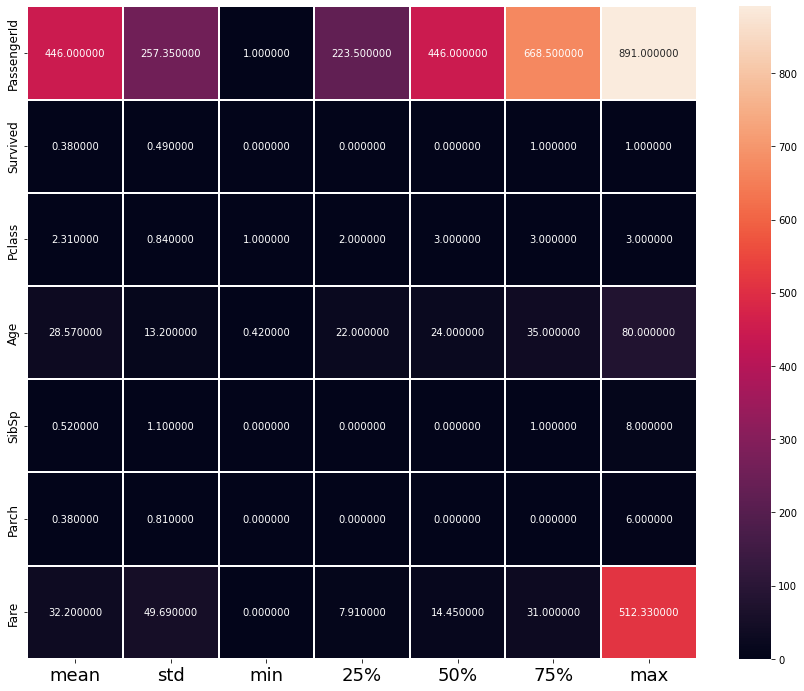

In [96]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12) 
plt.show()

Above we can see that there is 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from 0.4 to 80. On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature.

# observation

Name

mean:445

median:445

min:0

Max: 880

Age

mean:28

median:24

min:0.42

Max: 80

SibSp

mean:0.52

median:0

min:0

Max: 8

Parch

mean:0.381

median:0

min:0

Max: 6

Ticket

mean:338.52

median:337

min:0

Max: 680

Fare

mean:32

median:14

min:0

Max: 512

Cabin

mean:53

median:47

min:0

Max: 146

Eambarked

mean:1.57

median:2

min:0

Max: 2

# Ticket,Fare,Cabin and Embarked there mean is greater than median so skewness is present

# AGE

Now we need to convert the ‘age’ feature. First we will convert it from float into integer. Then we will create the new ‘AgeGroup” variable, by categorizing every age into a group. Note that it is important to place attention on how you form these groups, since you don’t want for example that 80% of your data falls into group 1.

# Encoding of DataFrame

In [97]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [98]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [99]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108.0,1.0,22.0,1,0,523.0,7.2500,47.0,2.0
1,2,1,1,190.0,0.0,38.0,1,0,596.0,71.2833,81.0,0.0
2,3,1,3,353.0,0.0,26.0,0,0,669.0,7.9250,47.0,2.0
3,4,1,1,272.0,0.0,35.0,1,0,49.0,53.1000,55.0,2.0
4,5,0,3,15.0,1.0,35.0,0,0,472.0,8.0500,47.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1.0,27.0,0,0,101.0,13.0000,47.0,2.0
887,888,1,1,303.0,0.0,19.0,0,0,14.0,30.0000,30.0,2.0
888,889,0,3,413.0,0.0,24.0,1,2,675.0,23.4500,47.0,2.0
889,890,1,1,81.0,1.0,26.0,0,0,8.0,30.0000,60.0,0.0


# outlayer checking

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    float64
 4   Sex          891 non-null    float64
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    float64
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    float64
 11  Embarked     891 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 83.7 KB


In [101]:
from sklearn.preprocessing import LabelEncoder
for column in df:
    if df[column].dtypes == 'object':
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])

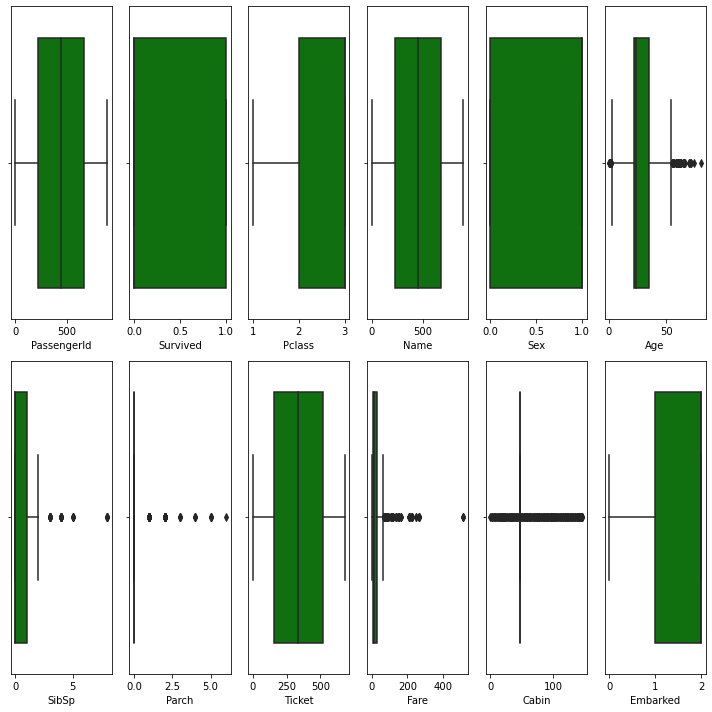

In [102]:
colist=df.columns.values
graph=1
plt.figure(figsize=(10,10))
for i in range(0, len(colist)):
    plt.subplot(2,6,graph)
    sns.boxplot(df[colist[i]],color='green',orient='h')
    graph+=1
    plt.tight_layout()

# Skewness

In [103]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.657753
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Cabin          2.268926
Embarked      -1.264823
dtype: float64

# Normal Distribution Curve

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

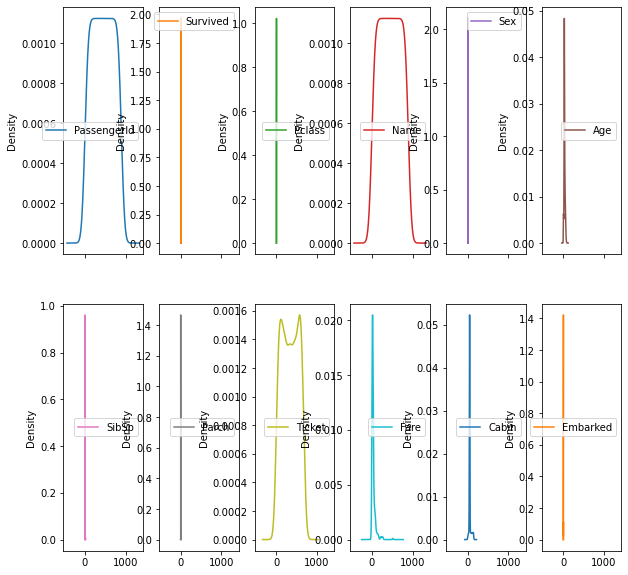

In [104]:
df.plot(kind='kde',subplots=True,layout=(2,6),figsize=(10,10))

# Data cleaning

In [105]:
df.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Name          -0.057343
Sex           -0.543351
Age           -0.052872
SibSp         -0.035322
Parch          0.081629
Ticket        -0.164549
Fare           0.257307
Cabin          0.175690
Embarked      -0.167675
Name: Survived, dtype: float64

In [106]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108.0,1.0,22.0,1,0,523.0,7.2500,47.0,2.0
1,2,1,1,190.0,0.0,38.0,1,0,596.0,71.2833,81.0,0.0
2,3,1,3,353.0,0.0,26.0,0,0,669.0,7.9250,47.0,2.0
3,4,1,1,272.0,0.0,35.0,1,0,49.0,53.1000,55.0,2.0
4,5,0,3,15.0,1.0,35.0,0,0,472.0,8.0500,47.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1.0,27.0,0,0,101.0,13.0000,47.0,2.0
887,888,1,1,303.0,0.0,19.0,0,0,14.0,30.0000,30.0,2.0
888,889,0,3,413.0,0.0,24.0,1,2,675.0,23.4500,47.0,2.0
889,890,1,1,81.0,1.0,26.0,0,0,8.0,30.0000,60.0,0.0


In [107]:
x=df.drop("Survived",axis=1)
y=df["Survived"]#target

In [108]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,108.0,1.0,22.0,1,0,523.0,7.2500,47.0,2.0
1,2,1,190.0,0.0,38.0,1,0,596.0,71.2833,81.0,0.0
2,3,3,353.0,0.0,26.0,0,0,669.0,7.9250,47.0,2.0
3,4,1,272.0,0.0,35.0,1,0,49.0,53.1000,55.0,2.0
4,5,3,15.0,1.0,35.0,0,0,472.0,8.0500,47.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,548.0,1.0,27.0,0,0,101.0,13.0000,47.0,2.0
887,888,1,303.0,0.0,19.0,0,0,14.0,30.0000,30.0,2.0
888,889,3,413.0,0.0,24.0,1,2,675.0,23.4500,47.0,2.0
889,890,1,81.0,1.0,26.0,0,0,8.0,30.0000,60.0,0.0


In [109]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [110]:
x.skew().sort_values(ascending=False)

Fare           4.787317
SibSp          3.695352
Parch          2.749117
Cabin          2.268926
Age            0.657753
Ticket         0.000246
PassengerId    0.000000
Name           0.000000
Sex           -0.618921
Pclass        -0.630548
Embarked      -1.264823
dtype: float64

we can see skewness in most of the column of our dataset,we will remove the skewness using power transform function

In [111]:
from sklearn.preprocessing import power_transform

In [112]:
x_new=power_transform(x)

In [113]:
type(x_new)

numpy.ndarray

In [114]:
x.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [115]:
sk=x.skew()
sk

PassengerId    0.000000
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.657753
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Cabin          2.268926
Embarked      -1.264823
dtype: float64

Skewness hasbeen removed




# Feature engineering

Feature engineering is the where we can process of using domain knowledge of the data to create features (feature vectors) that make machine learning algorithms work.

feature vector is an n-dimensional vector of numerical features that is represent some object. Many algorithms in machine learning require a numerical representation of objects, since such representations facilitate are processing and statistical analysis.

# So we can use VIF to check Multicollinearity

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [117]:
def calc_vif():
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vif)

In [118]:
calc_vif()

      variables  VIF FACTOR
0   PassengerId    3.773968
1        Pclass    9.632175
2          Name    3.876446
3           Sex    3.107031
4           Age    5.348127
5         SibSp    1.583314
6         Parch    1.619846
7        Ticket    4.528928
8          Fare    1.933180
9         Cabin    5.267535
10     Embarked    4.962355


We have seen in the "Pclass" there is high multicollinearity is present so we should drop that column

In [119]:
x=df.drop("Pclass",axis=1)

In [120]:
x

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,108.0,1.0,22.0,1,0,523.0,7.2500,47.0,2.0
1,2,1,190.0,0.0,38.0,1,0,596.0,71.2833,81.0,0.0
2,3,1,353.0,0.0,26.0,0,0,669.0,7.9250,47.0,2.0
3,4,1,272.0,0.0,35.0,1,0,49.0,53.1000,55.0,2.0
4,5,0,15.0,1.0,35.0,0,0,472.0,8.0500,47.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,548.0,1.0,27.0,0,0,101.0,13.0000,47.0,2.0
887,888,1,303.0,0.0,19.0,0,0,14.0,30.0000,30.0,2.0
888,889,0,413.0,0.0,24.0,1,2,675.0,23.4500,47.0,2.0
889,890,1,81.0,1.0,26.0,0,0,8.0,30.0000,60.0,0.0


# Outlayer removing

In [121]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(891, 12)

In [122]:
threshold=3 #rule of thumb
print(np.where(z>3))

(array([  6,  10,  13,  16,  25,  27,  50,  59,  66,  68,  71,  75,  86,
        88,  96, 116, 118, 119, 128, 148, 159, 164, 167, 171, 180, 182,
       183, 193, 201, 205, 233, 251, 258, 261, 262, 266, 278, 299, 309,
       311, 324, 337, 339, 340, 341, 345, 360, 370, 377, 380, 386, 394,
       434, 437, 438, 438, 456, 462, 480, 493, 516, 527, 541, 542, 557,
       558, 567, 577, 585, 610, 618, 630, 638, 662, 672, 678, 679, 683,
       686, 689, 699, 700, 715, 716, 724, 730, 736, 737, 742, 745, 772,
       774, 776, 779, 787, 792, 809, 813, 824, 835, 846, 850, 851, 858,
       863, 885], dtype=int64), array([10, 10,  7,  6,  7,  9,  6,  6, 10,  6,  6, 10,  7,  9,  5,  5,  9,
        6, 10, 10,  6,  6,  7,  6,  6,  6, 10, 10,  6, 10,  6, 10,  9,  6,
       10,  6,  6,  9, 10,  9,  6, 10, 10, 10,  9, 10,  7, 10,  9,  9,  6,
       10, 10,  7,  7,  9, 10, 10,  6,  5, 10,  9,  6,  6,  9, 10,  7, 10,
       10,  7, 10,  5,  7, 10,  5,  7,  9,  6,  6,  9, 10,  9, 10,  9, 10,
        9,  7,  

In [123]:
len(np.where(z>3)[0])

106

In [124]:
z.iloc[6]

PassengerId    1.706781
Survived       0.789272
Pclass         1.566107
Name           0.272152
Sex            0.737695
Age            1.927889
SibSp          0.474545
Parch          0.473674
Ticket         1.262983
Fare           0.395814
Cabin          3.199324
Embarked       0.585954
Name: 6, dtype: float64

In [125]:
import pandas as pd

In [126]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108.0,1.0,22.0,1,0,523.0,7.2500,47.0,2.0
1,2,1,1,190.0,0.0,38.0,1,0,596.0,71.2833,81.0,0.0
2,3,1,3,353.0,0.0,26.0,0,0,669.0,7.9250,47.0,2.0
3,4,1,1,272.0,0.0,35.0,1,0,49.0,53.1000,55.0,2.0
4,5,0,3,15.0,1.0,35.0,0,0,472.0,8.0500,47.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1.0,27.0,0,0,101.0,13.0000,47.0,2.0
887,888,1,1,303.0,0.0,19.0,0,0,14.0,30.0000,30.0,2.0
888,889,0,3,413.0,0.0,24.0,1,2,675.0,23.4500,47.0,2.0
889,890,1,1,81.0,1.0,26.0,0,0,8.0,30.0000,60.0,0.0


In [127]:
df_new_z.shape

(786, 12)

In [128]:
df.shape

(891, 12)

# Percentage of data loss:

In [129]:
(891-786)/891*100

11.784511784511785

11.78% data are lost

In [130]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [131]:
x

array([[-2.14814111, -0.78927234, -1.351096  , ..., -0.87882001,
        -0.19397367,  0.61041095],
       [-2.13183003,  1.2669898 , -0.93828827, ...,  1.33665056,
         1.25278617, -1.78052001],
       [-2.117043  ,  1.2669898 , -0.24765444, ..., -0.79006485,
        -0.19397367,  0.61041095],
       ...,
       [ 1.55071925, -0.78927234, -0.01877308, ...,  0.28888536,
        -0.19397367,  0.61041095],
       [ 1.55371741,  1.2669898 , -1.50551816, ...,  0.52790578,
         0.42291929, -1.78052001],
       [ 1.5567146 , -0.78927234, -0.80116669, ..., -0.81234947,
        -0.19397367, -1.23633916]])

In [132]:
sk[np.abs(sk)>0.5].all()

True

In [133]:
x.skew()

AttributeError: 'numpy.ndarray' object has no attribute 'skew'

In [134]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.14814111, -0.78927234, -1.351096  , ..., -0.87882001,
        -0.19397367,  0.61041095],
       [-2.13183003,  1.2669898 , -0.93828827, ...,  1.33665056,
         1.25278617, -1.78052001],
       [-2.117043  ,  1.2669898 , -0.24765444, ..., -0.79006485,
        -0.19397367,  0.61041095],
       ...,
       [ 1.55071925, -0.78927234, -0.01877308, ...,  0.28888536,
        -0.19397367,  0.61041095],
       [ 1.55371741,  1.2669898 , -1.50551816, ...,  0.52790578,
         0.42291929, -1.78052001],
       [ 1.5567146 , -0.78927234, -0.80116669, ..., -0.81234947,
        -0.19397367, -1.23633916]])

# Since the data has only 2 output we will use classification model

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [136]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("randam state=",i,"The model is performing very wel")
        print("Traning accuracy score is=",i)
        print("Testing accuracy score is=",i)

randam state= 0 The model is performing very wel
Traning accuracy score is= 0
Testing accuracy score is= 0
randam state= 1 The model is performing very wel
Traning accuracy score is= 1
Testing accuracy score is= 1
randam state= 2 The model is performing very wel
Traning accuracy score is= 2
Testing accuracy score is= 2
randam state= 3 The model is performing very wel
Traning accuracy score is= 3
Testing accuracy score is= 3
randam state= 4 The model is performing very wel
Traning accuracy score is= 4
Testing accuracy score is= 4
randam state= 5 The model is performing very wel
Traning accuracy score is= 5
Testing accuracy score is= 5
randam state= 6 The model is performing very wel
Traning accuracy score is= 6
Testing accuracy score is= 6
randam state= 7 The model is performing very wel
Traning accuracy score is= 7
Testing accuracy score is= 7
randam state= 8 The model is performing very wel
Traning accuracy score is= 8
Testing accuracy score is= 8
randam state= 9 The model is performi

randam state= 108 The model is performing very wel
Traning accuracy score is= 108
Testing accuracy score is= 108
randam state= 109 The model is performing very wel
Traning accuracy score is= 109
Testing accuracy score is= 109
randam state= 110 The model is performing very wel
Traning accuracy score is= 110
Testing accuracy score is= 110
randam state= 111 The model is performing very wel
Traning accuracy score is= 111
Testing accuracy score is= 111
randam state= 112 The model is performing very wel
Traning accuracy score is= 112
Testing accuracy score is= 112
randam state= 113 The model is performing very wel
Traning accuracy score is= 113
Testing accuracy score is= 113
randam state= 114 The model is performing very wel
Traning accuracy score is= 114
Testing accuracy score is= 114
randam state= 115 The model is performing very wel
Traning accuracy score is= 115
Testing accuracy score is= 115
randam state= 116 The model is performing very wel
Traning accuracy score is= 116
Testing accura

randam state= 217 The model is performing very wel
Traning accuracy score is= 217
Testing accuracy score is= 217
randam state= 218 The model is performing very wel
Traning accuracy score is= 218
Testing accuracy score is= 218
randam state= 219 The model is performing very wel
Traning accuracy score is= 219
Testing accuracy score is= 219
randam state= 220 The model is performing very wel
Traning accuracy score is= 220
Testing accuracy score is= 220
randam state= 221 The model is performing very wel
Traning accuracy score is= 221
Testing accuracy score is= 221
randam state= 222 The model is performing very wel
Traning accuracy score is= 222
Testing accuracy score is= 222
randam state= 223 The model is performing very wel
Traning accuracy score is= 223
Testing accuracy score is= 223
randam state= 224 The model is performing very wel
Traning accuracy score is= 224
Testing accuracy score is= 224
randam state= 225 The model is performing very wel
Traning accuracy score is= 225
Testing accura

Traning accuracy score is= 326
Testing accuracy score is= 326
randam state= 327 The model is performing very wel
Traning accuracy score is= 327
Testing accuracy score is= 327
randam state= 328 The model is performing very wel
Traning accuracy score is= 328
Testing accuracy score is= 328
randam state= 329 The model is performing very wel
Traning accuracy score is= 329
Testing accuracy score is= 329
randam state= 330 The model is performing very wel
Traning accuracy score is= 330
Testing accuracy score is= 330
randam state= 331 The model is performing very wel
Traning accuracy score is= 331
Testing accuracy score is= 331
randam state= 332 The model is performing very wel
Traning accuracy score is= 332
Testing accuracy score is= 332
randam state= 333 The model is performing very wel
Traning accuracy score is= 333
Testing accuracy score is= 333
randam state= 334 The model is performing very wel
Traning accuracy score is= 334
Testing accuracy score is= 334
randam state= 335 The model is per

randam state= 401 The model is performing very wel
Traning accuracy score is= 401
Testing accuracy score is= 401
randam state= 402 The model is performing very wel
Traning accuracy score is= 402
Testing accuracy score is= 402
randam state= 403 The model is performing very wel
Traning accuracy score is= 403
Testing accuracy score is= 403
randam state= 404 The model is performing very wel
Traning accuracy score is= 404
Testing accuracy score is= 404
randam state= 405 The model is performing very wel
Traning accuracy score is= 405
Testing accuracy score is= 405
randam state= 406 The model is performing very wel
Traning accuracy score is= 406
Testing accuracy score is= 406
randam state= 407 The model is performing very wel
Traning accuracy score is= 407
Testing accuracy score is= 407
randam state= 408 The model is performing very wel
Traning accuracy score is= 408
Testing accuracy score is= 408
randam state= 409 The model is performing very wel
Traning accuracy score is= 409
Testing accura

randam state= 478 The model is performing very wel
Traning accuracy score is= 478
Testing accuracy score is= 478
randam state= 479 The model is performing very wel
Traning accuracy score is= 479
Testing accuracy score is= 479
randam state= 480 The model is performing very wel
Traning accuracy score is= 480
Testing accuracy score is= 480
randam state= 481 The model is performing very wel
Traning accuracy score is= 481
Testing accuracy score is= 481
randam state= 482 The model is performing very wel
Traning accuracy score is= 482
Testing accuracy score is= 482
randam state= 483 The model is performing very wel
Traning accuracy score is= 483
Testing accuracy score is= 483
randam state= 484 The model is performing very wel
Traning accuracy score is= 484
Testing accuracy score is= 484
randam state= 485 The model is performing very wel
Traning accuracy score is= 485
Testing accuracy score is= 485
randam state= 486 The model is performing very wel
Traning accuracy score is= 486
Testing accura

randam state= 551 The model is performing very wel
Traning accuracy score is= 551
Testing accuracy score is= 551
randam state= 552 The model is performing very wel
Traning accuracy score is= 552
Testing accuracy score is= 552
randam state= 553 The model is performing very wel
Traning accuracy score is= 553
Testing accuracy score is= 553
randam state= 554 The model is performing very wel
Traning accuracy score is= 554
Testing accuracy score is= 554
randam state= 555 The model is performing very wel
Traning accuracy score is= 555
Testing accuracy score is= 555
randam state= 556 The model is performing very wel
Traning accuracy score is= 556
Testing accuracy score is= 556
randam state= 557 The model is performing very wel
Traning accuracy score is= 557
Testing accuracy score is= 557
randam state= 558 The model is performing very wel
Traning accuracy score is= 558
Testing accuracy score is= 558
randam state= 559 The model is performing very wel
Traning accuracy score is= 559
Testing accura

randam state= 661 The model is performing very wel
Traning accuracy score is= 661
Testing accuracy score is= 661
randam state= 662 The model is performing very wel
Traning accuracy score is= 662
Testing accuracy score is= 662
randam state= 663 The model is performing very wel
Traning accuracy score is= 663
Testing accuracy score is= 663
randam state= 664 The model is performing very wel
Traning accuracy score is= 664
Testing accuracy score is= 664
randam state= 665 The model is performing very wel
Traning accuracy score is= 665
Testing accuracy score is= 665
randam state= 666 The model is performing very wel
Traning accuracy score is= 666
Testing accuracy score is= 666
randam state= 667 The model is performing very wel
Traning accuracy score is= 667
Testing accuracy score is= 667
randam state= 668 The model is performing very wel
Traning accuracy score is= 668
Testing accuracy score is= 668
randam state= 669 The model is performing very wel
Traning accuracy score is= 669
Testing accura

randam state= 736 The model is performing very wel
Traning accuracy score is= 736
Testing accuracy score is= 736
randam state= 737 The model is performing very wel
Traning accuracy score is= 737
Testing accuracy score is= 737
randam state= 738 The model is performing very wel
Traning accuracy score is= 738
Testing accuracy score is= 738
randam state= 739 The model is performing very wel
Traning accuracy score is= 739
Testing accuracy score is= 739
randam state= 740 The model is performing very wel
Traning accuracy score is= 740
Testing accuracy score is= 740
randam state= 741 The model is performing very wel
Traning accuracy score is= 741
Testing accuracy score is= 741
randam state= 742 The model is performing very wel
Traning accuracy score is= 742
Testing accuracy score is= 742
randam state= 743 The model is performing very wel
Traning accuracy score is= 743
Testing accuracy score is= 743
randam state= 744 The model is performing very wel
Traning accuracy score is= 744
Testing accura

randam state= 809 The model is performing very wel
Traning accuracy score is= 809
Testing accuracy score is= 809
randam state= 810 The model is performing very wel
Traning accuracy score is= 810
Testing accuracy score is= 810
randam state= 811 The model is performing very wel
Traning accuracy score is= 811
Testing accuracy score is= 811
randam state= 812 The model is performing very wel
Traning accuracy score is= 812
Testing accuracy score is= 812
randam state= 813 The model is performing very wel
Traning accuracy score is= 813
Testing accuracy score is= 813
randam state= 814 The model is performing very wel
Traning accuracy score is= 814
Testing accuracy score is= 814
randam state= 815 The model is performing very wel
Traning accuracy score is= 815
Testing accuracy score is= 815
randam state= 816 The model is performing very wel
Traning accuracy score is= 816
Testing accuracy score is= 816
randam state= 817 The model is performing very wel
Traning accuracy score is= 817
Testing accura

randam state= 882 The model is performing very wel
Traning accuracy score is= 882
Testing accuracy score is= 882
randam state= 883 The model is performing very wel
Traning accuracy score is= 883
Testing accuracy score is= 883
randam state= 884 The model is performing very wel
Traning accuracy score is= 884
Testing accuracy score is= 884
randam state= 885 The model is performing very wel
Traning accuracy score is= 885
Testing accuracy score is= 885
randam state= 886 The model is performing very wel
Traning accuracy score is= 886
Testing accuracy score is= 886
randam state= 887 The model is performing very wel
Traning accuracy score is= 887
Testing accuracy score is= 887
randam state= 888 The model is performing very wel
Traning accuracy score is= 888
Testing accuracy score is= 888
randam state= 889 The model is performing very wel
Traning accuracy score is= 889
Testing accuracy score is= 889
randam state= 890 The model is performing very wel
Traning accuracy score is= 890
Testing accura

randam state= 989 The model is performing very wel
Traning accuracy score is= 989
Testing accuracy score is= 989
randam state= 990 The model is performing very wel
Traning accuracy score is= 990
Testing accuracy score is= 990
randam state= 991 The model is performing very wel
Traning accuracy score is= 991
Testing accuracy score is= 991
randam state= 992 The model is performing very wel
Traning accuracy score is= 992
Testing accuracy score is= 992
randam state= 993 The model is performing very wel
Traning accuracy score is= 993
Testing accuracy score is= 993
randam state= 994 The model is performing very wel
Traning accuracy score is= 994
Testing accuracy score is= 994
randam state= 995 The model is performing very wel
Traning accuracy score is= 995
Testing accuracy score is= 995
randam state= 996 The model is performing very wel
Traning accuracy score is= 996
Testing accuracy score is= 996
randam state= 997 The model is performing very wel
Traning accuracy score is= 997
Testing accura

In [137]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix

In [138]:
print(classification_report(y_test,pred_test))
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        64

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

1.0
[[115   0]
 [  0  64]]


Here accuracy_score is 1.0 and here true positive and true nagetive rate is 115 and 64

# RandomForestClassifier

In [139]:
 from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 100.0
[[115   0]
 [  0  64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        64

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Here accuracy_score is 1.0 and here true positive and true nagetive rate is 115 and 64

# KNeighborsClassifier

In [140]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
preknn=knn.predict(x_test)
print(accuracy_score(y_test,preknn))
print(confusion_matrix(y_test,preknn))
print(classification_report(y_test,preknn))

1.0
[[115   0]
 [  0  64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        64

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Here accuracy_score is 1.0 and here true positive and true nagetive rate is 115 and 64

# SVC

In [141]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 100.0
[[115   0]
 [  0  64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        64

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Here accuracy_score is 1.0 and here true positive and true nagetive rate is 115 and 64

# Stochastic Gradient Descent (SGD):

In [142]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)

sgd.score(x_train, y_train)

acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[115   0]
 [  0  64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        64

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Here accuracy_score is 1.0 and here true positive and true nagetive rate is 115 and 64

# Perceptron:

In [143]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(x_train, y_train)

y_pred = perceptron.predict(x_test)

acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[115   0]
 [  0  64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        64

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Here accuracy_score is 1.0 and here true positive and true nagetive rate is 115 and 64

# Linear Support Vector Machine:

In [144]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[115   0]
 [  0  64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        64

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Here accuracy_score is 1.0 and here true positive and true nagetive rate is 115 and 64

# Gaussian Naive Bayes:

In [145]:
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)  
y_pred = gaussian.predict(x_test)  
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[115   0]
 [  0  64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        64

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Here accuracy_score is 1.0 and here true positive and true nagetive rate is 115 and 64

In [146]:
#Let's check cv ...and see model is overfitted or not
from sklearn.model_selection import cross_val_score

# SVC

In [147]:
scr1=cross_val_score(svc,x,y,cv=5)
print("CV score for SVC Model:",scr1.mean())

CV score for SVC Model: 1.0


# RandomForestClassifier

In [148]:
scr=cross_val_score(rf,x,y,cv=5)
print("CV score for Random Forest Model:",scr.mean())


CV score for Random Forest Model: 1.0


# Logistic

In [149]:
scr2=cross_val_score(lr,x,y,cv=5)
print("CV score for Logistic Model:",scr2.mean())

CV score for Logistic Model: 1.0


# KNeighborsClassifier

In [150]:
scr3=cross_val_score(knn,x,y,cv=5)
print("CV score for KNN Model:",scr3.mean())

CV score for KNN Model: 0.9899001945891659


Cv for RandomForestClassifier

In [151]:
lsscore_selected=cross_val_score(lr,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr)

The cv score is:- 1.0 
The accuracy score is:- [1. 1. 1. 1. 1.]


CV for SVC

In [152]:
lsscore_selected=cross_val_score(svc,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr1)

The cv score is:- 1.0 
The accuracy score is:- [1. 1. 1. 1. 1.]


CV for LR

In [153]:
sscore_selected=cross_val_score(lr,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr2)

The cv score is:- 1.0 
The accuracy score is:- [1. 1. 1. 1. 1.]


As we can see, the Random Forest classifier which is goes on the first place. But first, let us check, how random-forest performs, when we can use the cross validation.

# K-Fold Cross Validation:

K-Fold Cross Validation which is randomly splits the training data into the K subsets called folds. Let’s image we would split to our data into 4 folds (K = 4). Our random forest model would be trained and evaluated 4 times, using to different fold for evaluation everytime,  it will be trained on the remaining 3 folds.

The image below of shows of the process, using 4 folds (K = 4). Every row represents one training + evaluation process. In the first row, the model get’s trained on the first, second and third subset and evaluated on the fourth. In the second row, the model get’s trained on the second, third and fourth subset and evaluated on the first. K-Fold Cross Validation repeats this process till every fold acted once as an evaluation fold.

In [154]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.0
Standard Deviation: 0.0


# Random Forest

# Why we using Random Forest ?

Random Forest is a robust machine learning algorithm which used for the variety of atasks including regression and classification. It is an ensemble method, meaning that a random forest model is made for  large number of small decision trees, called estimators, which is produce their own predictions.

In [155]:
from IPython.display import Image
Image(url="https://html.scirp.org/file/2-6101790x14.png")

Random forest which is builds multiple no of decision trees and merges them together to get the more accurate and the stable prediction.

One of the big advantage of random forest is, that it can be used for both classification and regression problems,  the majority of the current machine learning systems. With a few exceptions a random-forest classifier has all the hyperparameters of a decision-tree classifier and also all the hyperparameters of the bagging classifier which can control the ensemble itself.

The random-forest algorithm brings to the extra randomness into a model, when it is growing to the trees. The best feature while splitting a node, it searches for a best feature among to the random subset of a features. This process creates a wide diversity, which generally results in a better model. Therefore when you are growing a tree in random forest, only a random subset of the features is considered for splitting a node. You can even make trees more random, by using random thresholds on top of it, for each feature rather than searching for the best possible thresholds (like a normal decision tree does).

# HYPERMETER TUNNING

hyperparamter tuning for the parameters where we can see criterion, min_samples_leaf, min_samples_split and n_estimators.

I have put this code into a markdown cell and not into a code cell, because it takes a long time to run it.

In [156]:
RandomForestClassifier()

RandomForestClassifier()

In [157]:
from sklearn.model_selection import GridSearchCV

In [158]:
parameters={"max_features":['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}

In [159]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto'}

In [160]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [161]:
GCV.best_estimator_

RandomForestClassifier(max_depth=4)

In [162]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

1.0

# Let's Test new Parameters:

In [163]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(x_train, y_train)
Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 100.0 %


oob score: 100 %

We have the proper model, we can start evaluating it’s performace in the more accurate way.  we can used accuracy and the oob score, that is just another way to form of accuracy. The problem is just, that it’s the more complicated to evaluate a classification model than a regression model. We will talk about this in the following section.

# Further Evaluation
Confusion Matrix:

In [164]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)


array([[434,   0],
       [  0, 278]], dtype=int64)

A confusion matrix gives you a lot of information about how well your model does, but theres a way to get even more, like computing the classifiers precision.

# Precision and Recall:

In [165]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 1.0
Recall: 1.0


Precision: 1.0
Recall: 1.0

Our model predicts 100% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 100 % of the people who actually survived.

# F-Score

now I can combine precision and recall into one score, that is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

In [166]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

1.0

# Precision Recall Curve

Now we can see that a 100 % F-score. The score which is not that high it is same, because we have a recall of 100%. But unfortunately the F-score is perfect. 
This is a problem, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the precision/recall tradeoff. We will discuss this in the following section.

For each person the Random Forest algorithm we have to classify, it computes a probability based on a function and it classifies the person as they survived or as not survived (when the score is smaller than the threshold). 

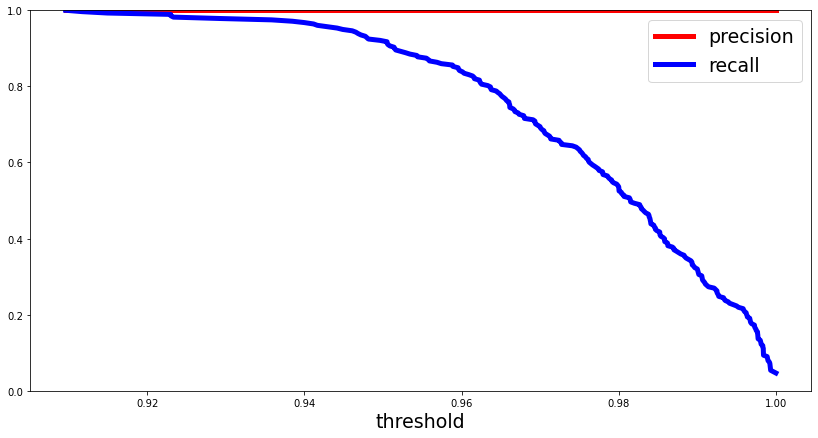

In [167]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(x_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Above you can clearly see that the recall is falling of rapidly at a precision of around 100%. Because of that you may want to select the precision/recall tradeoff before that — maybe at around 85 %.

# AUC_ROC

Another way to evaluate and compare the binary classifier is provided by the ROC AUC Curve. This curve which is plots to the true positive rate against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

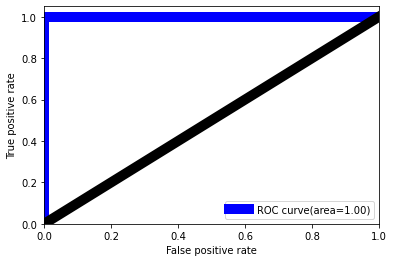

In [168]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,pred_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='BLUE',lw=10,label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='black',lw=10,linestyle='-')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

The black line in the middel represents a purely random classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible. Our Random Forest model seems to do a good job.

Of course we also have a tradeoff here, because the classifier produces more false positives, the higher the true positive rate is.

# ROC AUC Score

The ROC AUC Score which is the corresponding score to the ROC AUC Curve. which is simply computed by measuring the area under the curve, where we can called AUC.

A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of .5

In [169]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 1.0


ROC_AUC_SCORE: 1.0

I think the score is veryy good

# We are getting accuracy and cross validation both as 99.8% which shows model performing very well

# Model Saving

In [170]:
import pickle
filename="Titanic blog.pkl"
pickle.dump(lr,open(filename,'wb'))

# Conclusion:

In [171]:
loaded_model=pickle.load(open('Titanic blog.pkl','rb'))
results=loaded_model.score(x_test,y_test)

In [172]:
results

1.0

In [174]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],predictions[:]],index=['Predicted','Orginal'])

In [175]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,702,703,704,705,706,707,708,709,710,711
Predicted,1,0,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Orginal,1,0,0,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
